# Лабораторная работа №1
## по предмету "оптимальное управление"
```
Выполнил: студент гр. А-14м-16 Мигаль И.А
Проверил: Зубков Павел Валерьевич
```

In [ ]:
import sys
sys.path.insert(0, '/home/ivmig/OneDrive/Documents/A-14m-16/2CURSE3SEM/optimal_control/lab_1/')
print(sys.path)

In [1]:
print(__doc__)

# Author: Ivan Migal ivan.migal@mail.ru
# License: BSD 3 clause

import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
from matplotlib import colors as mcolors
import utils

from utils import array
from utils import TDMA


colors = list(mcolors.BASE_COLORS)
colors += list(mcolors.CSS4_COLORS.keys())

Automatically created module for IPython interactive environment


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 12, 12
plt.style.use('ggplot')
# Настройка шрифта
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

---
# Инициализация данных
```
    Обозначения см. в описании Л.Р. №1
    
```

In [3]:
# Словарь параметров
p_d = {}

In [4]:
# Заданные положительные величины
p_d['a'], p_d['l'], p_d['v'], p_d['T'] = 1., 1., 1., 50.

# Решение тестового примера
def x(s, t):
    return math.sin(t) + math.sin(s + math.pi / 2.)

# Плотность источников тепла
def f(s, t):
    return math.cos(t) + p_d['a'] ** 2 * math.sin(s + math.pi / 2.)
    
# Температура внешней среды
def p(t):
    #return 1. / p_d['v'] * math.cos(p_d['l'] + math.pi / 2) + math.sin(t) + math.sin(p_d['l'] + math.pi / 2)
    return 0.
    
# Распределение температуры в начальный момент времени
def fi(s):
    return math.sin(s + math.pi / 2.)

p_d['p(t)'] = p

p_d['f(s, t)'] = f

# Заданные числа
p_d['p_min'], p_d['p_max'], p_d['R'] = -100., 100., 100.

p_d['fi(s)'] = fi

# Желаемое распределение температуры
def y(s):
    #return s * math.sin(s + math.pi / 2.)
    return math.sin(p_d['T']) + math.sin(s + math.pi / 2.)

p_d['y(s)'] = y

# Число точек на пространственной и временной сетке соответственно
N = 10
p_d['N'], p_d['M'] = N, 10 + N * N

# Шаг на пространственной и временной сетке соответственно
p_d['dh'], p_d['dt'] = p_d['l'] / p_d['N'], p_d['T'] / p_d['M']
p_d['l'], p_d['T'], p_d['dh'], p_d['dt']

(1.0, 50.0, 0.1, 0.45454545454545453)

---
# Создание модели и управление

In [5]:
model = utils.Lab1OptCtrlModel(p_d)

In [6]:
criterion = utils.criterion_3
get_alpha = utils.get_alpha_5

In [7]:
model.solve(criterion, get_alpha, eps=10**-5)

2272727.2727272725
0.0190629141294
0.00747586478874
0.00620693089366
0.0055548857026
0.00506176955535
0.00465664204073
0.00431439666333
0.00402064562716
0.00376546974092
0.00354155911382
0.00334335831729
0.00316656178428
0.0030077808041
0.00286431245342
0.00273397481525
0.00261498723314
0.00250588194596
0.00240543798656
0.00231263111402
0.00222659544767
0.00214659374767
0.00207199415888
0.00200225183921
0.00193689431716
0.0018755097242
0.00181773726387
0.00176325943585
0.00171179564831
0.00166309693692
0.00161694157219
0.00157313138503
0.00153148867637
0.00149185360499
0.00145408196881
0.00141804331191
0.00138361930249
0.0013507023373
0.00131919433627
0.00128900569766
0.00126005438901
0.0012322651538
0.00120556881673
0.00117990167357
0.00115520495379
0.0011314243458
0.00110850957661
0.00108641403855
0.00106509445703
0.00104451059416
0.00102462498375
0.00100540269382
0.00098681111335
0.000968819760401
0.000951400109172
0.000934525433762
0.000918170666825
0.000902312271452
0.000886928124

5.88528316024e-05
5.86417379493e-05
5.84317393384e-05
5.82228281639e-05
5.80149968875e-05
5.78082380368e-05
5.7602544205e-05
5.73979080499e-05
5.71943222937e-05
5.69917797218e-05
5.67902731824e-05
5.65897955857e-05
5.63903399036e-05
5.61918991686e-05
5.59944664731e-05
5.57980349695e-05
5.56025978687e-05
5.54081484401e-05
5.52146800106e-05
5.50221859642e-05
5.48306597414e-05
5.46400948386e-05
5.44504848075e-05
5.42618232545e-05
5.407410384e-05
5.38873202784e-05
5.37014663368e-05
5.3516535835e-05
5.33325226446e-05
5.31494206889e-05
5.29672239419e-05
5.2785926428e-05
5.26055222216e-05
5.24260054465e-05
5.22473702752e-05
5.20696109287e-05
5.18927216759e-05
5.17166968332e-05
5.15415307638e-05
5.13672178773e-05
5.11937526294e-05
5.10211295215e-05
5.08493430998e-05
5.06783879553e-05
5.05082587231e-05
5.03389500822e-05
5.01704567548e-05
5.0002773506e-05
4.98358951434e-05
4.96698165166e-05
4.95045325169e-05
4.93400380769e-05
4.91763281697e-05
4.90133978092e-05
4.88512420491e-05
4.86898559829e-0

1.6787035038e-05
1.67510783246e-05
1.67152277356e-05
1.66794828645e-05
1.66438433068e-05
1.66083086597e-05
1.65728785224e-05
1.65375524962e-05
1.6502330184e-05
1.64672111907e-05
1.64321951231e-05
1.63972815899e-05
1.63624702014e-05
1.63277605701e-05
1.629315231e-05
1.62586450371e-05
1.62242383692e-05
1.61899319259e-05
1.61557253284e-05
1.61216181999e-05
1.60876101652e-05
1.60537008511e-05
1.60198898859e-05
1.59861768996e-05
1.59525615243e-05
1.59190433934e-05
1.58856221422e-05
1.58522974076e-05
1.58190688284e-05
1.57859360449e-05
1.5752898699e-05
1.57199564344e-05
1.56871088965e-05
1.56543557322e-05
1.56216965901e-05
1.55891311204e-05
1.55566589749e-05
1.55242798071e-05
1.5491993272e-05
1.54597990261e-05
1.54276967278e-05
1.53956860367e-05
1.53637666142e-05
1.53319381232e-05
1.53002002281e-05
1.52685525948e-05
1.52369948908e-05
1.52055267852e-05
1.51741479484e-05
1.51428580525e-05
1.5111656771e-05
1.50805437789e-05
1.50495187527e-05
1.50185813702e-05
1.4987731311e-05
1.49569682558e-05


In [8]:
model.final_step

1192

In [9]:
X_ = np.arange(0., p_d['l'] + p_d['dh'], p_d['dh'])
Y_ = np.arange(0., p_d['T'] + p_d['dt'], p_d['dt'])

---
# Процесс управления

In [10]:
y_s = model.y_arr
bounds = [min(min(y_s), min(model.x_arr[-1][-1,:])), max(max(y_s), max(model.x_arr[-1][-1,:]))]

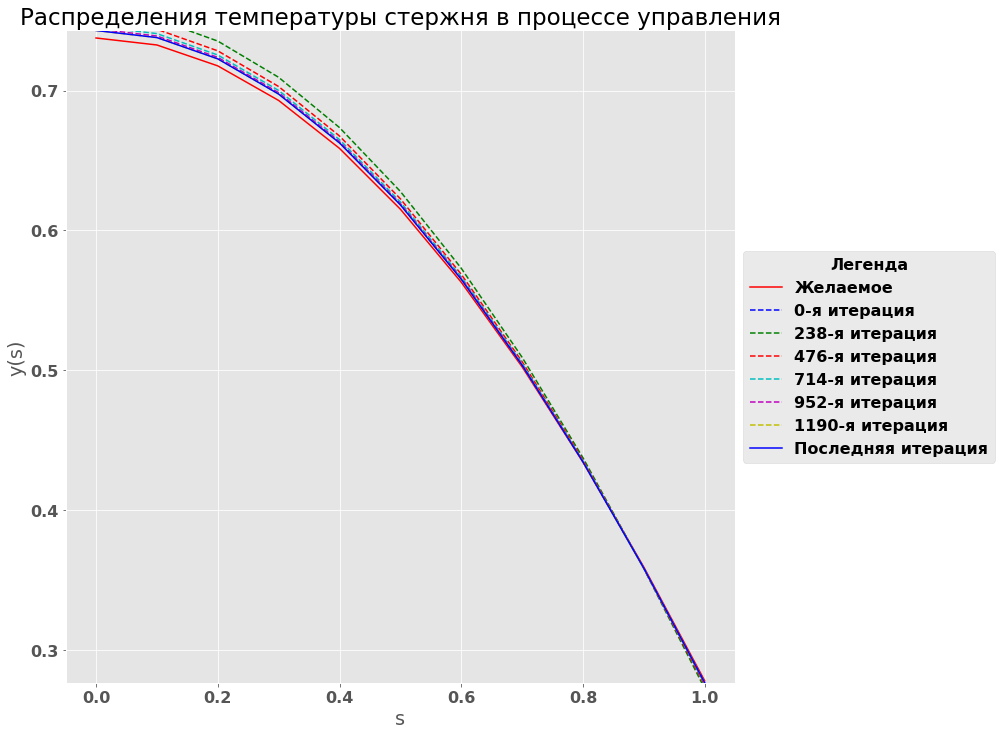

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_, y_s, color='r', label='Желаемое')
part = 1
count = 5
step = int(model.final_step / count / part)
for i in range(0, int(model.final_step / part), step):
    ax.plot(X_, model.x_arr[i][-1,:], color=colors[int(i / step)], linestyle='--', label='{}-я итерация'.format(i))
ax.plot(X_, model.x_arr[-1][-1,:], color='b', label='Последняя итерация')
ax.set_ylim(bounds)
plt.xlabel('s')
plt.ylabel('y(s)')
plt.title('Распределения температуры стержня в процессе управления')
plt.legend(title='Легенда', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# Желаемое и полученное распределение температур

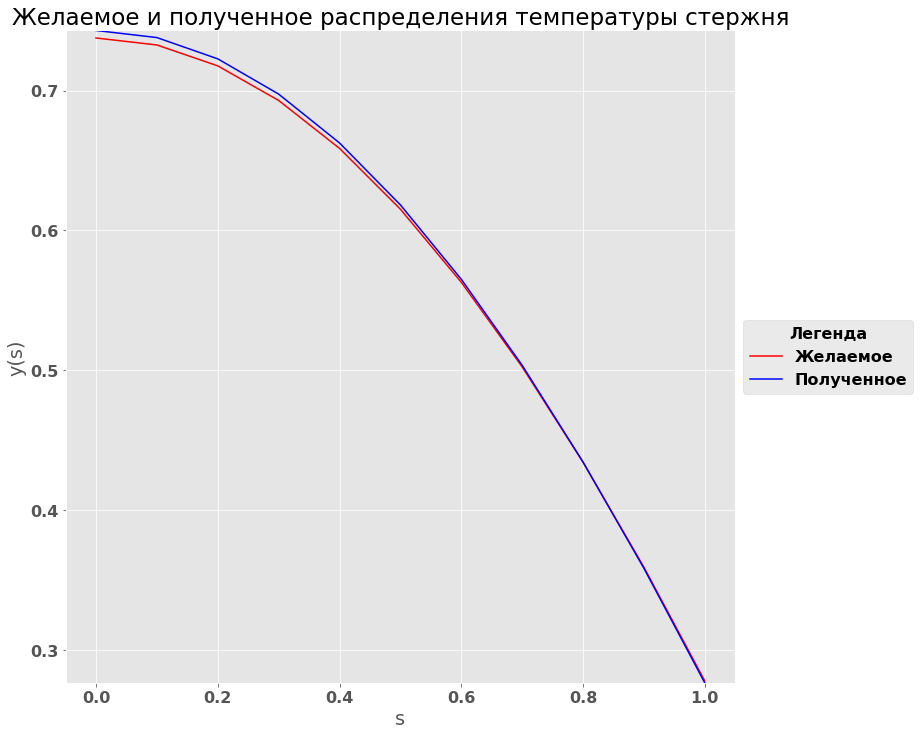

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_, y_s, color='r', label='Желаемое')
ax.plot(X_, model.x_arr[-1][-1,:], color='b', label='Полученное')
ax.set_ylim(bounds)
plt.xlabel('s')
plt.ylabel('y(s)')
plt.title('Желаемое и полученное распределения температуры стержня')
plt.legend(title='Легенда', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# Управление

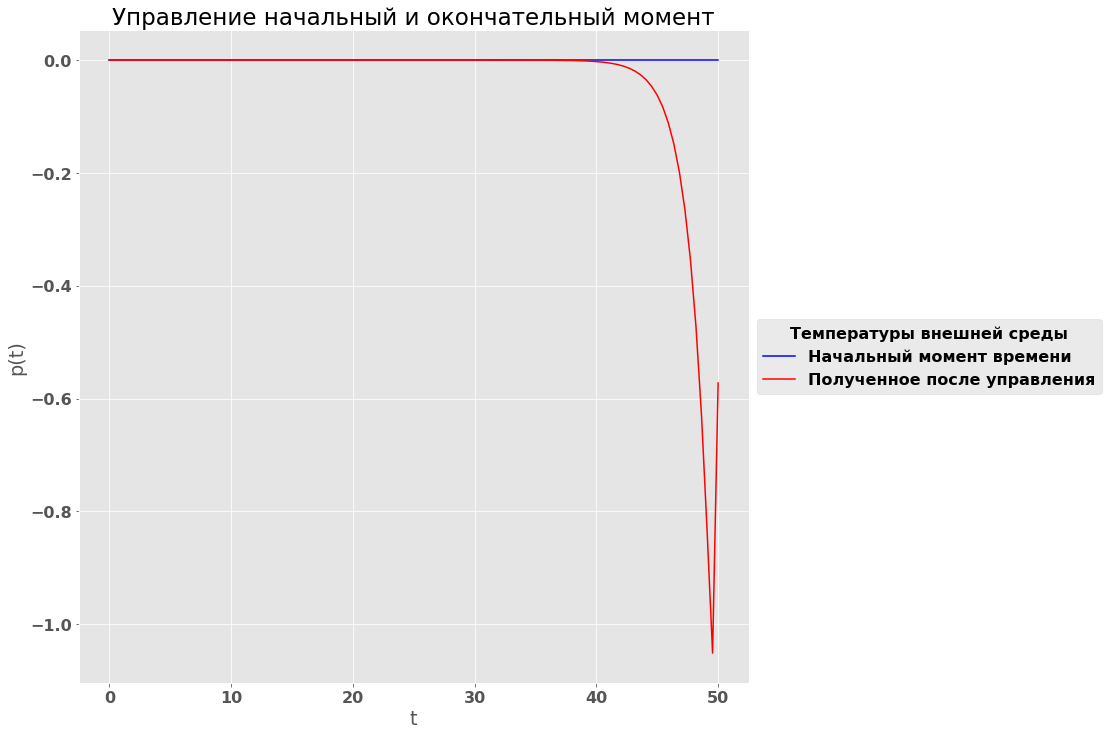

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Y_, model.p_arr[0], color='b', label='Начальный момент времени')
ax.plot(Y_, model.p_arr[-1], color='r', label='Полученное после управления')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.title('Управление начальный и окончательный момент')
plt.legend(title='Температуры внешней среды', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# График изменения ошибки

(9.9872914150818623e-06, 0.10000998729141508)

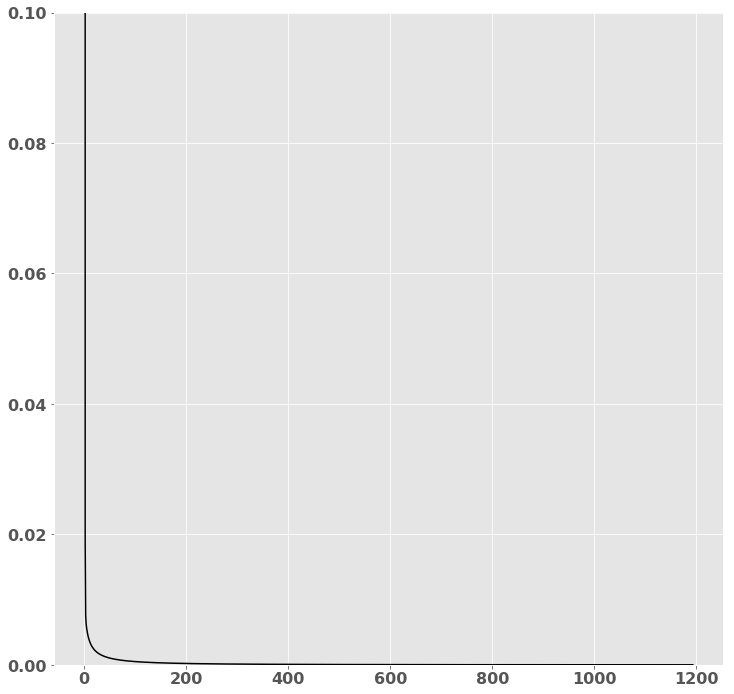

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(model.err, color='black', label='Ошибка')
ax.set_ylim([min(model.err), min(model.err) + .1])